In [22]:
%matplotlib notebook
import numpy as np
MEPS = np.finfo(float).eps
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import animation
from IPython.display import HTML

from scipy.optimize import brentq
from scipy.stats import linregress as linreg

from scipy.integrate import quadrature

from rbf import *

In [26]:
matplotlib.rcParams.update({'font.size': 14})

# Problem

Consider the one dimensional heat equation $u_{xx} = -u_t$ on the interval $0 \leq x \leq 1$ with the dirichlet boundary conditions. With the initial condition given by the function below.

In [38]:
a, b = 0, 1
def foo_init(x):
    return np.sin(np.pi*x)
    
def exact(x,t):
    return np.sin(np.pi*x)*np.exp(-np.pi**2 * t) 

<IPython.core.display.Javascript object>


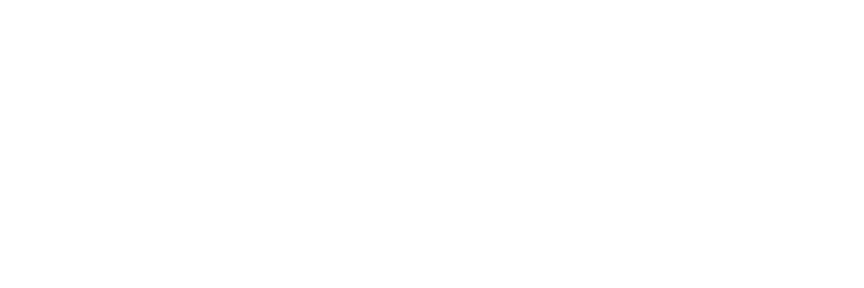

<IPython.core.display.Javascript object>


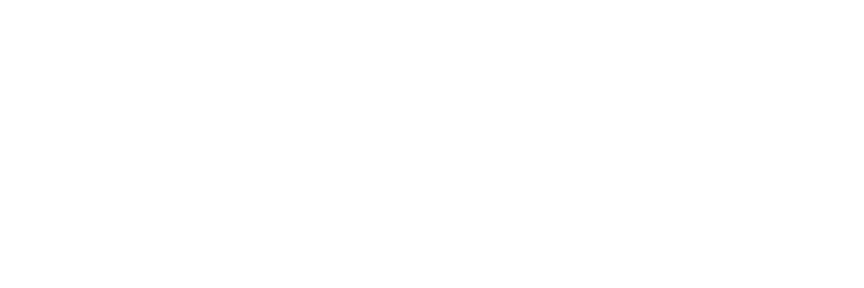

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [40]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_xlim((a, b))
ax.set_ylim((0, 1.1))

line, = ax.plot([], [], lw=2)
def init():
    line.set_data([], [])
    return (line,)
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = exact(x, i*.01)
    line.set_data(x, y)
    return (line,)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)
HTML(anim.to_jshtml())

In [41]:
n = 100
deg = 3

# Calculate finite difference weights
def rbf(r):
    return r**9
def Lrbf(r):
    return 72*r**7

xs = np.linspace(a,b,n)
dist_mat = np.abs(np.subtract.outer(xs,xs))
A = rbf(dist_mat)
P = np.power.outer(xs, np.arange(1+deg))
AP = np.block([[A, P],[P.T, np.zeros((1+deg,1+deg))]])
rhs = Lrbf(dist_mat)

W = la.solve(AP, )